# CS4619: Artificial Intelligence 2

## Logistic Regression

### Derek Bridge<br> School of Computer Science and Information Technology<br> University College Cork

# Initialization $\newcommand{\Set}[1]{\{#1\}}$ $\newcommand{\Tuple}[1]{\langle#1\rangle}$ $\newcommand{\v}[1]{\pmb{#1}}$ $\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ $\newcommand{\rv}[1]{[#1]}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

<p>
    <b>Logistic regression</b> is a popular method for classification. An important point is that, in
    its conventional form, it can only be used for binary classification.
</p>
<p>
    The hypotheses that logistic regression learns are ones that output numbers between 0 and 1. 
    We interpret these numbers as probabilities: 
    $h_{\v{\beta}}(\v{x})$ is the probability that $\v{x}$ belongs to class 1. In symbols:
    $$h_{\v{\beta}}(\v{x}) = P(y = 1 | \v{x}; \v{\beta})$$
    &mdash; the output of the hypothesis is the probability that $y = 1$ given $\v{x}$ and parameters $\v{\beta}$.
</p>
<p>
    Obviously, $1 - h_{\v{\beta}}(\v{x})$ is the 
    probability that $\v{x}$ belongs to class 0:
    $$1 - h_{\v{\beta}}(\v{x}) = P(y = 0 | \v{x}; \v{\beta})$$
    And thus you can see why logistic regression gives us a binary
    classifier. If $h_{\v{\beta}}(\v{x}) \geq 0.5$, 
    we predict $\hat{y} = 1$; when $h_{\v{\beta}}(\v{x}) < 0.5$, we predict $\hat{y} = 0$.
</p>
<p>
    By the way, it is because logistic regressors predicts
    probabilities (numbers) that they are related to regression. 
</p>

# The Hypotheses for Logistic Regression

<p>
    In Linear Regression, each hypothesis $h_{\v{\beta}}$ was of the form 
    $$h_{\v{\beta}}(\v{x}) = \v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n$$
    Can we use this kind of model to predict probabilities?
</p>
<p>
    Suppose we use OLS Linear Regression to learn a model of the above form on the CS1109 dataset. 
    So that we can have a 2D visualisation, I'll use only one of the features ($\mathit{lab}$).
    The blue line is the best fit to the dataset:
</p>

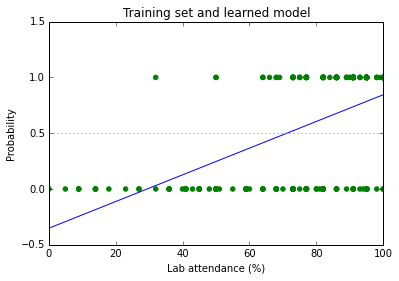

In [3]:
from sklearn import linear_model

# Read CSV file
df = pd.read_csv("dataset-cs1109.csv")

# Get the feature-values into a separate numpy arrays of numbers and the target values into a separate 
# numpy arrays of ints
X = df[['lab']].values
y = df['outcome'].values

estimator = linear_model.LinearRegression()
estimator.fit(X, y)

def f_learned(lab):
    return estimator.intercept_ + estimator.coef_ * lab

fig = plt.figure()
plt.title("Training set and learned model")
plt.xlabel("Lab attendance (%)")
plt.xlim(0, 100)
plt.ylabel("Probability")
plt.ylim(-0.5, 1.5)
xvals = np.linspace(0, 100, 2)
plt.plot(xvals, f_learned(xvals), color = 'blue')
plt.scatter(X, y, color = 'green')
plt.plot([0, 100], [0.5, 0.5], linestyle = 'dotted', color = 'gray')
plt.show()

<p>
    Question:
</p>
<ul>
    <li>What's the problem?</li>
</ul>
<p>
    To represent hypotheses that output values between 0 and 1, we modify the above to this:
    $$h_{\v{\beta}}(\v{x}) = g(\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n)$$
    where
    $$g(z) = \frac{1}{1 + e^{-z}}$$
</p>
<p>
    $g$ is called the <b>logistic function</b> or <b>sigmoid function</b>. Plotted, it is kind of s-shaped, asymptotically
    approaching 0 and 1:
</p>

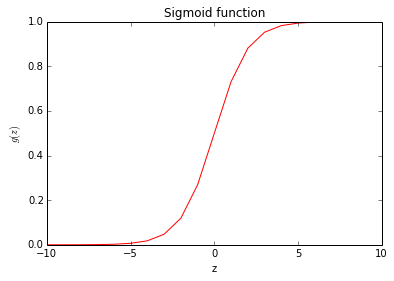

In [4]:
import math

def g(z):
    return 1 / (1 + math.exp(-z))

fig = plt.figure()
plt.title("Sigmoid function")
plt.xlabel("z")
plt.xlim(-10, 10)
plt.ylabel("$g(z)$")
plt.ylim(0.0, 1.0)
xvals = np.linspace(-10, 10, 21)
plt.plot(xvals, [g(xval) for xval in xvals], color = 'red')
plt.show()

## The Decision Boundary for Logistic Regression

<p>
    You can see from the plot of the sigmoid function above that $g(z) \geq 0.5$ when $z \geq 0$.
</p>
<ul>
    <li>
        Q: So, when will the classifier predict $\hat{y} = 1$?
        <ul>
            <li>
                A: Whenever the output of the hypothesis $h_{\v{\beta}} \geq 0.5$
            </li>
            <li>
                In other words, whenever $g(\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots 
                + \v{\beta}_n\v{x}_n) \geq 0.5$.
            </li>
            <li>
                Q: And when will this occur?
            </li>
            <li>
                A: Given what we just said about $g$, it will occur whenever 
                $\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n \geq 0$.
            </li>
            <li>
                Or, in other words, whenever 
                $\v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n \geq -\v{\beta}_0$.
            </li>
        </ul>
    </li>
    <li>
        Q: And when will the classifier predict $\hat{y} = 0$?
        <ul>
            <li>
                A: By similar reasoning, whenever
                $\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n < 0$.
            </li>
            <li>
                Or, in other words, whenever 
                $\v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n < -\v{\beta}_0$.
            </li>
        </ul>
    </li>
</ul>
<p>
    Let's use the CS1109 dataset to make this concrete and, so that we can plot in 2D, we will consider only two
    of its features, $\mathit{lect}$ (which we will designate $\v{x}_1$) and $\mathit{lab}$ (which we will designate
    $\v{x}_2$).
    Here we plot each example in the dataset, using a green plus symbol if the student passed ($y = 1$) and a 
    red 'x' if the student failed ($y = 0$).
</p>
<p>
    We will additionally draw a blue line to help us visualize a hypothesis, $h_{\v{\beta}}$. From the reasoning
    above, we know that a hypotheses predicts $\hat{y} = 1$ if $\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 \geq 0$,
    and it predicts $\hat{y} = 0$ if $\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 < 0$. So We'll plot
    the straight line $\v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 = 0$ (or $\v{x}_2 = -\frac{\v{\beta}_0}{\v{\beta}_2} - \frac{\v{\beta}_1\v{x}_1}{\v{\beta}_2}$). You can play with the values of
    $\v{\beta}$ to see different hypotheses. Obviously, we must use a learning algorithm to find the best values.
</p>

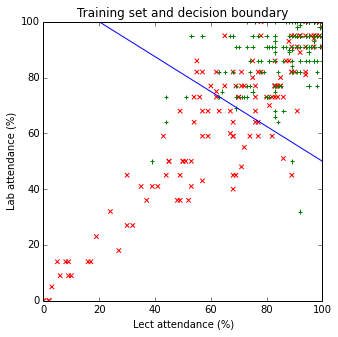

In [5]:
lect_values = df[['lect']].values
lab_values = df[['lab']].values
y = df['outcome'].values

# Play with these three:
beta0 = 90
beta1 = -0.5
beta2 = -0.8

def h(x1):
    return (-beta0 - beta1 * x1) * 1.0 / beta2

fig = plt.figure(figsize=(5,5))
plt.title("Training set and decision boundary")
plt.xlabel("Lect attendance (%)")
plt.xlim(0, 100)
plt.ylabel("Lab attendance (%)")
plt.ylim(0, 100)
xvals = np.array([0, 100])
plt.plot(xvals, h(xvals), color = 'blue')
for outcome, marker, colour in zip([0,1], "x+", "rg"):
    plt.scatter(lect_values[y == outcome], lab_values[y == outcome], c = colour, marker = marker)
plt.show()

<p>
    This straight blue line, given to us by our hypothesis, is called the <b>decision boundary</b>.
    Above the blue line, the hypotheses predicts $\hat{y} = 1$; below it, it predicts $\hat{y} = 0$.
    Of course, in general, with more than two features it is not a straight line it is a plane (3 features) or
    a hyperplane (arbitrary number of features).
</p>

# The Loss Function for Logistic Regression

<p>
    We cannot use the same loss function that we used for linear regression, i.e.
    $$J_{\v{\beta}}(\v{X}, \v{y}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{i)}) - \v{y}^{(i)})^2$$
    It would be comparing the wrong kinds of things! In logistic regression,
    $h_{\v{\beta}}(\v{x}^{i)})$ is a probability (the probability
    that $\hat{\v{y}}^{(i)} = 1$), whereas $\v{y}^{(i)}$ is the actual class of example $i$.
    It does not make sense to subtract one from the other.
</p>
<p>
    Furthermore, because of the way that $h_{\v{\beta}}$ is defined (using the sigmoid function), this loss function
    is not convex. It can have local minima. So we would need to use a search technique that did not assume that
    the first minimum that it found was the gloabl minimum.
    Better is to define a different loss function &mdash; one that <em>is</em> convex.
</p>
<p>
    This is the loss function that we will use:
    $$J_{\v{\beta}}(\v{X}, \v{y}) = \frac{1}{m}\sum_{i=1}^m(-\v{y}^{(i)}\log(h_{\v{\beta}}(\v{x}^{(i)}))
    - (1 - \v{y}^{(i)})\log(1 - h_{\v{\beta}}(\v{x}^{(i)})))$$
</p>
<p>
    For each example $\v{x}^{(i)}$, the loss function computes:
    $$-\v{y}^{(i)}\log(h_{\v{\beta}}(\v{x}^{(i)})) - (1 - \v{y}^{(i)})\log(1 - h_{\v{\beta}}(\v{x}^{(i)}))$$
</p>
<p>
    First, consider the case where $\v{y}^{(i)} = 1$. Then the above simplifies to:
    $$-\log(h_{\v{\beta}}(\v{x}^{(i)}))$$
    Let's plot this for different values of $h_{\v{\beta}}(\v{x}^{(i)})$:
</p>

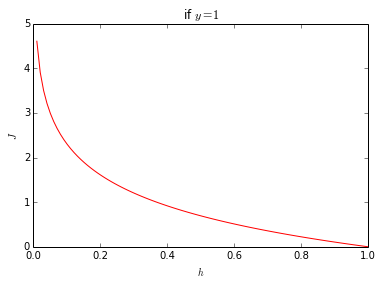

In [6]:
fig = plt.figure()
plt.title("if $y = 1$")
plt.xlabel("$h$")
plt.xlim(0, 1)
plt.ylabel("$J$")
xvals = np.linspace(0.01, 1, 99)
plt.plot(xvals, [-math.log(xval) for xval in xvals], color = 'red')
plt.show()

<p>
    Remember that $h_{\v{\beta}}(\v{x}^{(i)})$ is a probability &mdash; the probability that $\hat{\v{y}}^{(i)} = 1$.
</p>
<p>
    We see that, when $h_{\v{\beta}}(\v{x}^{(i)}) = 1$ (so it is predicting $\hat{\v{y}}^{(i)} = 1$ with absolute certainty),
    and $\v{y}^{(i)} = 1$, the hypothesis is correct, and the loss is zero.
</p>
<p>
    But when $h_{\v{\beta}}(\v{x}^{(i)}) \rightarrow 0$ (so it is very certain that $\hat{\v{y}}^{(i)} \neq 1$) and yet 
    $\v{y}^{(i)} = 1$, the hypothesis
    is very wrong, and we see that the loss $\rightarrow \infty$.
</p>
<p>
    Next, consider the case when $\v{y}^{(i)} = 0$. The formula this time simplifies to:
    $$-(\log(1 - h_{\v{\beta}}(\v{x}^{(i)}))$$
    which, for different values of $h_{\v{\beta}}(\v{x}^{(i)})$, looks like this:
</p>

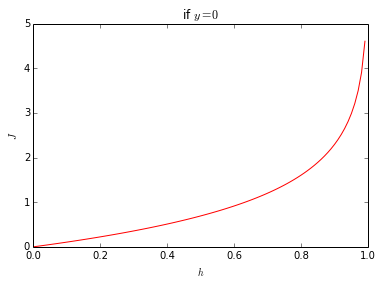

In [7]:
fig = plt.figure()
plt.title("if $y = 0$")
plt.xlabel("$h$")
plt.xlim(0, 1)
plt.ylabel("$J$")
xvals = np.linspace(0, 0.99, 99)
plt.plot(xvals, [-math.log(1 - xval) for xval in xvals], color = 'red')
plt.show()

<p>
    Here, when $h_{\v{\beta}}(\v{x}) = 0$ (so it is predicting $\hat{\v{y}}^{(i)} \neq 1$ with absolute certainty),
    and $\v{y}^{(i)} = 0$, the hypothesis is correct, and the loss is zero.
</p>
<p>
    But when $h_{\v{\beta}}(\v{x}) \rightarrow 1$ (so it is very certain that $\hat{\v{y}}^{(i)} = 1$) and yet 
    $\v{y}^{(i)} = 0$, the hypothesis
    is very wrong, and we see that the loss $\rightarrow \infty$.
</p>
<p>
    So that's our loss function! You might see it written like this:
    $$J_{\v{\beta}}(\v{X}, \v{y}) = -\frac{1}{m}\sum_{i=1}^m(\v{y}^{(i)}\log(h_{\v{\beta}}(\v{x}^{(i)}))
    + (1 - \v{y}^{(i)})\log(1 - h_{\v{\beta}}(\v{x}^{(i)})))$$
    where we bring the minus sign outside.
    In any case, the key point is: this loss function <em>is</em> convex.
</p>

# Gradient Descent for Logistic Regression

<p>
    Now we need a method for finding parameters $\v{\beta}$ that minimise the loss function that we defined above. 
    There is no equivalent to the normal equations that we used for OLS linear regression. So an iterative process
    must be used instead.
    We will illustrate with
    gradient descent. For this we need to take the partial derivatives of the loss function with respect to each
    $\v{\beta}_j$. Without going into the details, this is what we get:
    $$\frac{\partial J_{\v{\beta}}}{\partial\v{\beta}_j} =
    \frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
    This looks identical to what we had for linear regression! But remember, they use different
    definitions of $h_{\v{\beta}}$.
</p>
<p>
    All that remain is to plug this derivative into the update rules.
</p>
<p>
    Here's my implementation:
</p>

In [8]:
import numpy as np

def g(z):
    return 1 / (1 + np.exp(-z))

def J(beta, X, y):
    """
    Loss function for logistic regression
    """
    h = g(X.dot(beta))
    losses = y * np.log(h) + (1 - y) * np.log(1 - h)
    return - (1.0 / y.size) * losses.sum()

def gds_for_logistic_regression(X, y, alpha, num_iterations):
    """
    Gradient descent search for logistic regression.
    alpha is the learning rate.
    num_iterations is the numer of updates - instead of a better definition of convergence.
    It returns parameters beta and also a numpy array of size num_iterations, containing
    the value of the loss function, J, after each iteration - so you can plot it.
    """

    Jvals = np.zeros(num_iterations)
    m, n = X.shape
    beta = np.zeros(n)
    
    for iter in range(num_iterations):
        beta -= (1.0 * alpha / m) * (X.dot(beta) - y).dot(X)
        Jvals[iter] = J(beta, X, y)
 
    return beta, Jvals

<p>
    As before, if the features have very different ranges, scaling can make it easier to find a good value for learning
    rate $\alpha$. So let's run it on the full but scaled CS1109 dataset:
</p>

In [9]:
# Read CSV file
df = pd.read_csv("dataset-cs1109.csv")

# Insert the extra feature (all ones)
df.insert(loc=0, column='ones', value=1)

# lect, where min = 0 and max = 100 (it's a percentage)
# Subtract the min
# df['lect'] -= 0
# Divide by the range, i.e. max - min
df['lect'] /= 100

# lab, where min = 0 and max = 100 (it's a percentage)
# Subtract the min
# df['lab'] -= 0
# Divide by the range, i.e. max - min
df['lab'] /= 100

# cao, where min = 200 and max = 600
# Subtract the min
df['cao'] -= 200
# Divide by the range, i.e. max - min
df['cao'] /= 400

# Get the feature-values into a separate numpy arrays of numbers and the target values into a separate 
# numpy arrays of ints
X = df[['ones', 'lect', 'lab', 'cao']].values
y = df['outcome'].values

# Run the GDS
beta, Jvals = gds_for_logistic_regression(X, y, alpha = 0.03, num_iterations = 4000)

# Display beta
beta

array([-0.57112012,  0.3346734 ,  0.76213808,  0.61747532])

<p>
    From the values of $\v{\beta}$, we see that lab attendance is the key to passing CS1109.
</p>
<p>
    Here's a plot of the loss function over the iterations of the gradient descent:
</p>

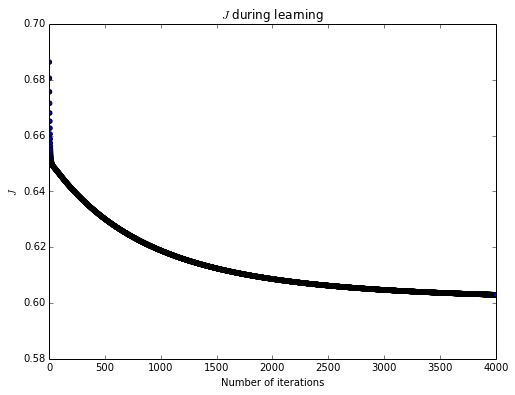

In [10]:
# Plot J
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.scatter(np.linspace(1, Jvals.size, Jvals.size), Jvals)
plt.show()

# Logistic Regression in Practice

<p>
   Obviously, you don't need my code for gradient descent. You would use scikit-learn's LogisticRegression class:
</p>

In [11]:
from sklearn.linear_model import LogisticRegression

# Read CSV file
df = pd.read_csv("dataset-cs1109.csv")

# lect, where min = 0 and max = 100 (it's a percentage)
# Subtract the min
# df['lect'] -= 0
# Divide by the range, i.e. max - min
df['lect'] /= 100

# lab, where min = 0 and max = 100 (it's a percentage)
# Subtract the min
# df['lab'] -= 0
# Divide by the range, i.e. max - min
df['lab'] /= 100

# cao, where min = 200 and max = 600
# Subtract the min
df['cao'] -= 200
# Divide by the range, i.e. max - min
df['cao'] /= 400

# Get the feature-values into a separate numpy arrays of numbers and the target values into a separate 
# numpy arrays of ints
X = df[['lect', 'lab', 'cao']].values
y = df['outcome'].values

estimator = LogisticRegression()
estimator.fit(X, y)

# Print the parameters that it learns
print('Intercept: ', estimator.intercept_)
print('Coefficients: ', estimator.coef_)

estimator.predict([[0.6, 0.45, 0.75]])

('Intercept: ', array([-3.82898815]))
('Coefficients: ', array([[ 1.58693859,  2.78235082,  1.69690614]]))


array([0])

<p>
    Some observations about this:
</p>
<ul>
    <li>
        scikit-learn's LogisticRegression does not use gradient descent. It uses a method called 'coordinate descent'.
        This and other advanced methods are often faster than gradient descent and avoid the need to pick a learning rate.
    </li>
    <li>
        scikit-learn's LogisticRegression automatically handles multiclass classification. 
        There is, in fact, a variation of logistic regression known as 'multinomial regression', which extends logistic
        regression to multiclass classification, but this is not what scikit-learn uses. It uses One-versus-Rest.
    </li>
    <li>
        scikit-learn's LogisticRegression always uses regularization.
        Its default is to use the $\cal{l}_2$-norm. We'll look at how to change this in a future lecture.
    </li>
</ul>